___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2021, 1, 1)
end

datetime.datetime(2021, 1, 1, 0, 0)

In [3]:
BAC = data.DataReader('BAC', 'yahoo', start, end)
citi = data.DataReader('C', 'yahoo', start, end)
GS = data.DataReader('GS', 'yahoo', start, end)
JPM = data.DataReader('JPM', 'yahoo', start, end)
MS = data.DataReader('MS', 'yahoo', start, end)
VTSAX = data.DataReader('VTSAX', 'yahoo', start, end)

In [4]:
VTSAX

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,30.480000,30.480000,30.480000,30.480000,0.0,22.654285
2006-01-04,30.629999,30.629999,30.629999,30.629999,0.0,22.765768
2006-01-05,30.639999,30.639999,30.639999,30.639999,0.0,22.773203
2006-01-06,30.950001,30.950001,30.950001,30.950001,0.0,23.003607
2006-01-09,31.090000,31.090000,31.090000,31.090000,0.0,23.107676
...,...,...,...,...,...,...
2020-12-24,93.910004,93.910004,93.910004,93.910004,0.0,93.319977
2020-12-28,94.400002,94.400002,94.400002,94.400002,0.0,93.806892
2020-12-29,94.029999,94.029999,94.029999,94.029999,0.0,93.439217


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
tickers = ['BAC', 'citi', 'GS', 'JPM', 'MS', 'VTSAX']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [6]:
stocks = pd.concat([BAC, citi, GS, JPM, MS, VTSAX], axis=1, keys=tickers)
stocks

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.280807   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.916729   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.960411   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.909451   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.931290   
...               ...        ...        ...        ...         ...        ...   
2020-12-24  30.270000  29.740000  30.270000  29.959999  22632300.0  29.686958   
2020-12-28  30.549999  29.990000  30.230000  30.129999  32861200.0  29.855410   
2020-12-29  30.250000  29.930000  30.170000  30.010000  33291900.0  29.736504   
2020-12-30  30.219999  29.940001  30.000000  29.980000  26370100.0  29.706776   
2020-12-31  30.389999  29.900000  30.010000  30.309999  28716000.0  30.033768   

                  citi                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   
...                ...         ...         ...         ...  ...        ...   
2020-12-24   61.090000   59.880001   60.930000   60.570000  ...  68.360001   
2020-12-28   61.930000   60.490002   60.619999   61.130001  ...  68.559998   
2020-12-29   61.400002   60.549999   61.150002   60.910000  ...  68.309998   
2020-12-30   61.270000   60.669998   60.910000   60.860001  ...  67.830002   
2020-12-31   61.849998   60.529999   60.669998   61.660000  ...  67.800003   

                                                 VTSAX                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  36.364140  30.480000  30.480000  30.480000   
2006-01-04  58.349998  7977800.0  36.389069  30.629999  30.629999  30.629999   
2006-01-05  58.509998  5778000.0  36.488869  30.639999  30.639999  30.639999   
2006-01-06  58.570000  6889800.0  36.526283  30.950001  30.950001  30.950001   
2006-01-09  59.189999  4144500.0  36.912933  31.090000  31.090000  31.090000   
...               ...        ...        ...        ...        ...        ...   
2020-12-24  68.089996  3126700.0  66.963593  93.910004  93.910004  93.910004   
2020-12-28  68.050003  7417100.0  66.924263  94.400002  94.400002  94.400002   
2020-12-29  67.709999  4701300.0  66.589882  94.029999  94.029999  94.029999   
2020-12-30  67.839996  5283200.0  66.717728  94.279999  94.279999  94.279999   
2020-12-31  68.529999  5297400.0  67.396317  94.739998  94.739998  94.739998   

                                         
                Close Volume  Adj Close  
Date                                     
2006-01-03  30.480000    0.0  22.654285  
2006-01-04  30.629999    0.0  22.765768  
2006-01-05  30.639999    0.0  22.773203  
2006-01-06  30.950001    0.0  23.003607  
2006-01-09  31.090000    0.0  23.107676  
...               ...    ...        ...  
2020-12-24  93.910004    0.0  93.319977  
2020-12-28  94.400002    0.0  93.806892  
2020-12-29  94.029999    0.0  93.439217  
2020-12-30  94.279999    0.0  93.687645  
2020-12-31  94.739998    0.0  94.144753  

[3776 rows x 36 columns]

** Set the column name levels (this is filled out for you):**

In [7]:
stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [8]:
stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                   citi                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.280807  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.916729  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.960411  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.909451  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.931290  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                       VTSAX             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.364140  30.480000  30.480000   
2006-01-04   58.700001  58.349998  7977800.0  36.389069  30.629999  30.629999   
2006-01-05   58.549999  58.509998  5778000.0  36.488869  30.639999  30.639999   
2006-01-06   58.770000  58.570000  6889800.0  36.526283  30.950001  30.950001   
2006-01-09   58.630001  59.189999  4144500.0  36.912933  31.090000  31.090000   

Bank Ticker                                          
Stock Info        Open      Close Volume  Adj Close  
Date                                                 
2006-01-03   30.480000  30.480000    0.0  22.654285  
2006-01-04   30.629999  30.629999    0.0  22.765768  
2006-01-05   30.639999  30.639999    0.0  22.773203  
2006-01-06   30.950001  30.950001    0.0  23.003607  
2006-01-09   31.090000  31.090000    0.0  23.107676  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [9]:
stocks.xs(key='Close', axis=1, level=1).max()

Bank Ticker
BAC       54.900002
citi     564.099976
GS       273.380005
JPM      141.089996
MS        89.300003
VTSAX     94.739998
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [10]:
stock_returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [37]:
tickers_list = []

for tick in tickers: 
        tickers_list.append(tick + ' return')
        stock_returns[tick + ' return'] = stocks[tick]['Close'].pct_change()

tickers_list
stock_returns

,BAC return,citi return,GS return,JPM return,MS return,VTSAX return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,0.004921
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,0.000326
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.010118
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.004523
...,...,...,...,...,...,...
2020-12-24,-0.002995,-0.003455,-0.001131,-0.004398,-0.001759,0.002669
2020-12-28,0.005674,0.009246,0.013390,0.006585,-0.000587,0.005218
2020-12-29,-0.003983,-0.003599,-0.006086,-0.002633,-0.004996,-0.003920


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

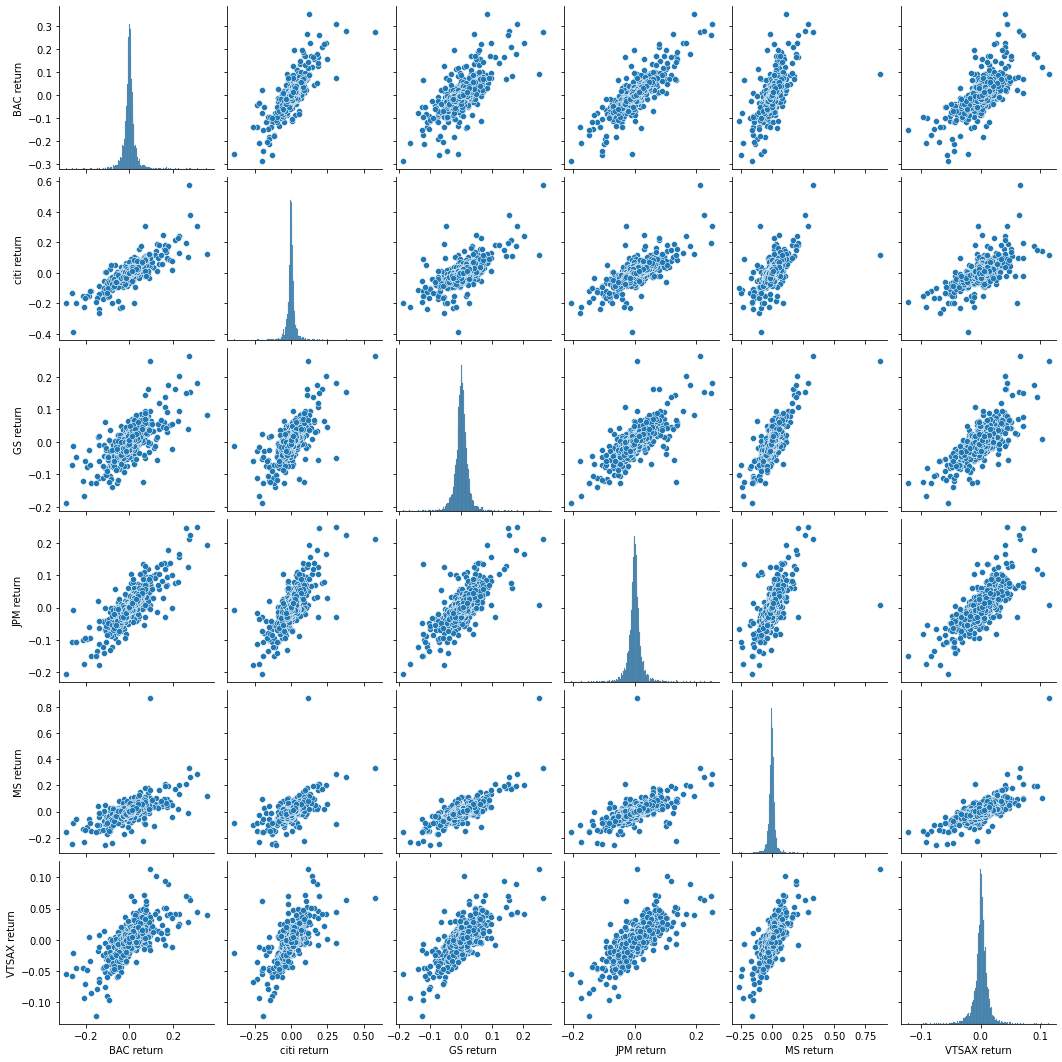

In [12]:
pairplot = sns.pairplot(data=stock_returns[1:])
pairplot

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [61]:
stock_returns.idxmin()

BAC return     2009-01-20
citi return    2009-02-27
GS return      2009-01-20
JPM return     2009-01-20
MS return      2008-10-09
VTSAX return   2020-03-16
dtype: datetime64[ns]

In [62]:
stock_returns.idxmax()

BAC return     2009-04-09
citi return    2008-11-24
GS return      2008-11-24
JPM return     2009-01-21
MS return      2008-10-13
VTSAX return   2008-10-13
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [63]:
stock_returns.std()

BAC return      0.032495
citi return     0.034400
GS return       0.023742
JPM return      0.025178
MS return       0.033381
VTSAX return    0.012992
dtype: float64

In [70]:
stock_returns['2015-01-01':'2015-12-31'].std()

BAC return      0.016163
citi return     0.015289
GS return       0.014046
JPM return      0.014017
MS return       0.016249
VTSAX return    0.009724
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/opt/anaconda3/envs/udemy/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='MS return', ylabel='Density'>

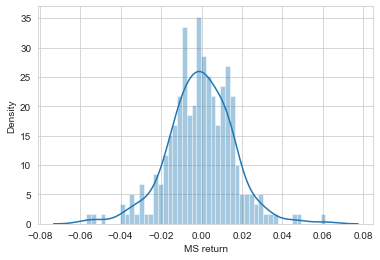

In [72]:
sns.distplot(stock_returns['2015-01-01':'2015-12-31']['MS return'], bins=50)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/opt/anaconda3/envs/udemy/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='citi return', ylabel='Density'>

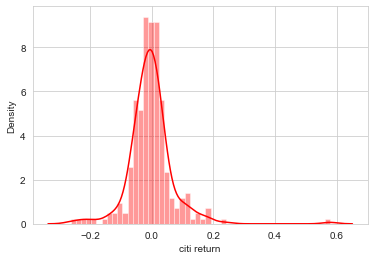

In [75]:
sns.distplot(stock_returns['2008-01-01':'2008-12-31']['citi return'], color='red', bins=50)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

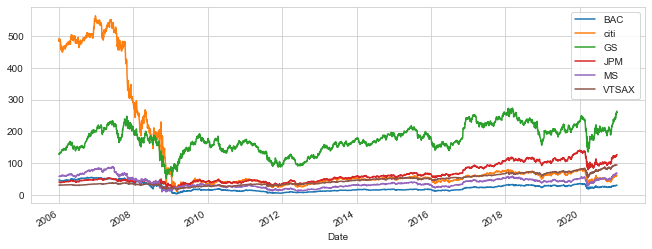

In [78]:
for tick in tickers: 
    stocks[tick]['Close'].plot(label=tick, figsize=(11,4))
plt.legend()

In [91]:
stocks.xs(key='Close', axis=1, level=1).iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

<AxesSubplot:xlabel='Date'>

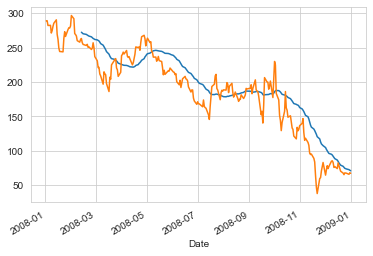

In [106]:
citi['Close']['01-01-2008':'01-01-2009'].rolling(window=30).mean().plot(label='30 day Rolling Avg')
citi['Close']['01-01-2008':'01-01-2009'].plot(label='Close Price')

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

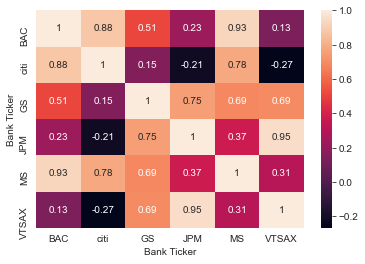

In [105]:
sns.heatmap(stocks.xs(key='Close', axis=1, level=1).corr(), annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

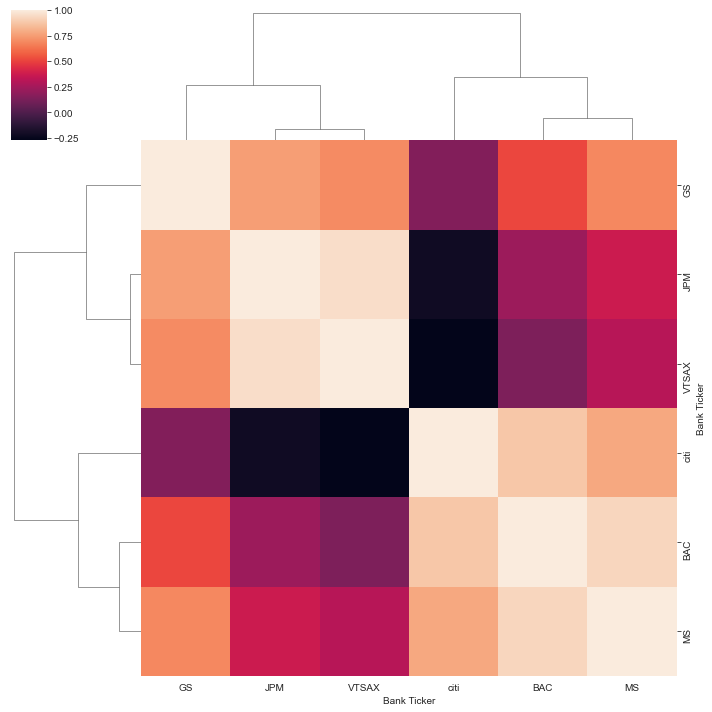

In [104]:
sns.clustermap(stocks.xs(key='Close', axis=1, level=1).corr())

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.